# Transformers are hardware-driven Architectures

copyright 2023, Denis Rothman

Transformers are hardware and data-driven architectures. This notebooks illustrates the hardware-driven perspective.

This notebook illlustrates the complexity for Self-attention and reccurent layers. The functions are not the actual algorithms of Transformers and RNNs. They simply show how the complexity of the layers varies with a CPU, a GPU, and a TPU.

Self-attention layers benefit from matrix multiplications whereas reccurent layers are mostly sequential.

The notebook is divided into 3 sections: CPU, GPU, and TPU.

[Attention is All You Need, Vaswani et al.(2017)](https://arxiv.org/abs/1706.03762), page 6:

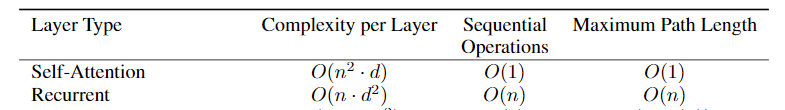





# CPU

In [ ]:
#Computional times of complexity per layer
# Comparing the computational time between:
# self attention = O(n^2 * d)
#and
# recurrent = O(n * d^2)
import numpy as np
import time

# define the sequence length and representation dimensionality
n = 512
d = 512

# define the inputs
input_seq = np.random.rand(n, d)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
for i in range(n):
    for j in range(n):
        _ = np.dot(input_seq[i], input_seq[j])
at=time.time()-start_time
print(f"Self-attention computation time: {time.time() - start_time} seconds")

# simulation of recurrent layer O(n*d^2)
start_time = time.time()
hidden_state = np.zeros(d)
for i in range(n):
    for j in range(d):
        for k in range(d):
            hidden_state[j] += input_seq[i, j] * hidden_state[k]
rt=time.time()-start_time
print(f"Recurrent layer computation time: {time.time() - start_time} seconds")
# Calculate the total
total = at + rt

# Calculate the percentage of at
percentage_at = round((at / total) * 100,2)

# Output the result
print(f"The percentage of 'computational time for attention' in the sum of 'attention' and 'recurrent' is {percentage_at}%")

# Calculate x, which is the ratio of rt to at
x = round(rt / at,2)

# Output the result
print(f"'Recurrent' is {x} times slower than 'self attention'")

Self-attention computation time: 1.1795403957366943 seconds
Recurrent layer computation time: 113.10320806503296 seconds
The percentage of 'computational time for attention' in the sum of 'attention' and 'recurrent' is 1.03%
'Recurrent' is 95.9 times slower than 'self attention'


## Output
   
Self-attention computation time: 1.1795403957366943 seconds  
Recurrent layer computation time: 113.10320806503296 seconds  
The percentage of 'computational time for attention' in the sum of 'attention' and 'recurrent' is 1.03%
'Recurrent' is 95.9 times slower than 'self attention'  

**Note:** the processors may evolve but the concepts remains the same.

# GPU

In [ ]:
# PyTorch version
import torch
import time

# define the sequence length and representation dimensionality
n = 512
d = 512

# Use GPU if available, otherwise stick with cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# define the inputs
input_seq = torch.rand(n, d, device=device)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
_ = torch.mm(input_seq, input_seq.t())
at = time.time() - start_time
print(f"Self-attention computation time: {at} seconds")

# simulation of recurrent layer O(n*d^2)
start_time = time.time()
hidden_state = torch.zeros(d, device=device)
for i in range(n):
    for j in range(d):
        for k in range(d):
            hidden_state[j] += input_seq[i, j] * hidden_state[k]
            ct = time.time() - start_time
            if ct>at*10:
              break

rt = time.time() - start_time
print(f"Recurrent layer computation time: {rt} seconds")

# Calculate the total
total = at + rt

# Calculate the percentage of at
percentage_at = round((at / total) * 100, 2)

# Output the result
print(f"The percentage of self-attention computation in the sum of self-attention and recurrent computation is {percentage_at}%")

# Calculate x, which is the ratio of rt to at
x = round(rt / at, 2)

# Output the result
print(f"'Recurrent' is {x} times slower than 'Self attention'")

cuda
Self-attention computation time: 3.301340103149414 seconds
Recurrent layer computation time: 40.44934272766113 seconds
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 7.55%
'Recurrent' is 12.25 times slower than 'Self attention'


## Output    
cuda
Self-attention computation time: 3.301340103149414 seconds  
Recurrent layer computation time: 40.44934272766113 seconds  
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 7.55%  
'Recurrent' is 12.25 times slower than 'Self attention'

**Note:**Note: the processors may evolve but the concepts remains the same.

In [ ]:
!nvidia-smi

Fri Jul 14 07:17:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    40W / 300W |   2160MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# TPU

In [ ]:
import tensorflow as tf
import numpy as np
import time

# define the sequence length and representation dimensionality
n = 512
d = 512

# define the inputs
input_seq = tf.random.normal((n, d), dtype=tf.float32)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
_ = tf.matmul(input_seq, input_seq, transpose_b=True)
at = time.time() - start_time
print(f"Self-attention computation time: {at} seconds")

# simulation of recurrent layer O(n*d^2)
start_time = time.time()
hidden_state = np.zeros((n, d), dtype=np.float32)
for i in range(n):
    for j in range(d):
        for k in range(d):
            hidden_state[i, j] += input_seq[i, j].numpy() * hidden_state[min(i,k), j]
            ct = time.time() - start_time
            if ct>at*10:
              break

rt = time.time() - start_time
print(f"Recurrent layer computation time: {rt} seconds")

# Calculate the total
total = at + rt

# Calculate the percentage of at
percentage_at = round((at / total) * 100, 2)

# Output the result
print(f"The percentage of self-attention computation in the sum of self-attention and recurrent computation is {percentage_at}%")

# Calculate x, which is the ratio of rt to at
x = round(rt / at, 2)

# Output the result
print(f"'Recurrent' is {x} times slower than 'Self attention'")

Self-attention computation time: 0.10399341583251953 seconds
Recurrent layer computation time: 66.4377453327179 seconds
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 0.16%
'Recurrent' is 638.86 times slower than 'Self attention'


## Output
Self-attention computation time: 0.10399341583251953 seconds  
Recurrent layer computation time: 66.4377453327179 seconds  
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 0.16%  
'Recurrent' is 638.86 times slower than 'Self attention'  
**Note:**
 The processors may evolve but the concepts remains the same.

## LLM configuration

In [2]:
import tensorflow as tf
import numpy as np
import time

# define the sequence length and representation dimensionality
n =  32768
d = 12288

# define the inputs
input_seq = tf.random.normal((n, d), dtype=tf.float32)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
_ = tf.matmul(input_seq, input_seq, transpose_b=True)

at = time.time() - start_time
print(f"Self-attention computation time: {at} seconds")

Self-attention computation time: 23.391557216644287 seconds


### Output LLM configuration

Self-attention computation time: 23.391557216644287 seconds

**Note:**   
The processors may evolve but the concepts remains the same.

### TPU information



In [3]:
import os
from tensorflow.python.profiler import profiler_client

tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

  Timestamp: 10:20:30
  TPU type: TPU v2
  Utilization of TPU Matrix Units (higher is better): 0.000%




**Output:**  
  Timestamp: 07:49:22  
  TPU type: TPU v2  
  Utilization of TPU Matrix Units (higher is better): 0.000%
